In [1]:
#Importing the required Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,confusion_matrix
import seaborn as sns 
plt.style.use('ggplot')
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.7.0


In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Fake news dectection/Data/Complete_DataSet_Clean.csv')

1    15681
0    11286
Name: label, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


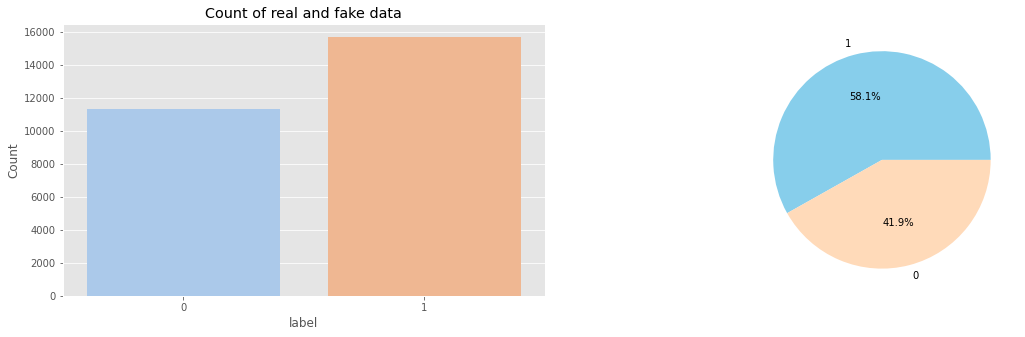

In [3]:
print(data["label"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(data.label,ax=ax[0],palette="pastel");
g1.set_title("Count of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("label")
g2 = plt.pie(data["label"].value_counts().values,explode=[0,0],labels=data.label.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

In [4]:
def clean_duplicates(dataframe):

    # Drop duplicate rows
    dataframe.drop_duplicates(subset='title', inplace=True)
    dataframe.drop_duplicates(subset='text', inplace=True)
    
    print("New shape:", dataframe.shape)
    return dataframe.head()

In [5]:
clean_duplicates(data)

New shape: (26967, 4)


,Unnamed: 0,title,text,label
0,0,PUTIN’S LATEST ATTACK AGAINST HILLARY CLINTON ...,We Are Change \nIn this video Luke Rudkowski c...,0
1,1,"On Tuesday, Voters Delivered a Stinging Rebuke...","In the course of about six hours, what was sup...",1
2,2,The Clinton email probe: Questions and answers,"Most breaking news stories, especiall...",1
3,3,US Insiders  Not Russia  Leaked Clinton Emails,US Insiders  Not Russia  Leaked Clinton Ema...,0
4,4,The top cop who thought he was a prosecutor,Beyond the precedent that the Justice Departm...,1


In [6]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
import re
nltk.download('stopwords')
stop_words = stopwords.words('english')
def preprocess(text):
      text = text.lower()
      text = re.sub('\[.*?\]', '', text) # remove square brackets
      text = re.sub(r'[^\w\s]','',text) # remove punctuation
      text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
      text = re.sub(r'http\S+', '', text)
      text = re.sub('\n', '', text)
      # remove any stopwords
      return [word for word in text.split() if word.lower() not in stop_words]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
clean_data = data.copy()
clean_data['text_clean'] = data.text.apply(preprocess)
clean_data['title_clean'] = data.title.apply(preprocess)
clean_data['text_clean']= clean_data['text_clean'].apply(lambda x:" ".join(x))
clean_data['title_clean']= clean_data['title_clean'].apply(lambda x:" ".join(x))

In [8]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nltk.download('wordnet')
lemm = WordNetLemmatizer()
def word_lemmatizer(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [lemm.lemmatize(w) for w in token_text]
    join_text = ' '.join(remove_stop)
    return join_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [9]:
lemmatize_data  = clean_data.copy()
lemmatize_data['text_clean'] = clean_data.text_clean.apply(lambda x : word_lemmatizer(x))
lemmatize_data['title_clean'] = clean_data.title_clean.apply(lambda x : word_lemmatizer(x))

In [10]:
lemmatize_data.head()

,Unnamed: 0,title,text,label,text_clean,title_clean
0,0,PUTIN’S LATEST ATTACK AGAINST HILLARY CLINTON ...,We Are Change \nIn this video Luke Rudkowski c...,0,change video luke rudkowski cover geopolitical...,putin latest attack hillary clinton u establis...
1,1,"On Tuesday, Voters Delivered a Stinging Rebuke...","In the course of about six hours, what was sup...",1,course six hour supposed republican existentia...,tuesday voter delivered stinging rebuke presid...
2,2,The Clinton email probe: Questions and answers,"Most breaking news stories, especiall...",1,breaking news story especially one based sourc...,clinton email probe question answer
3,3,US Insiders  Not Russia  Leaked Clinton Emails,US Insiders  Not Russia  Leaked Clinton Ema...,0,u insider russia leaked clinton email washingt...,u insider russia leaked clinton email
4,4,The top cop who thought he was a prosecutor,Beyond the precedent that the Justice Departm...,1,beyond precedent justice department particular...,top cop thought prosecutor


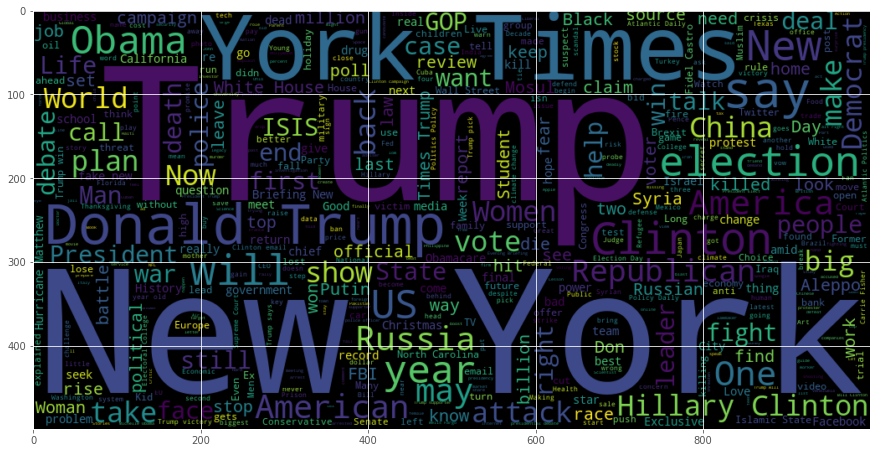

In [11]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(lemmatize_data[lemmatize_data.label == 1].title))
plt.imshow(wc , interpolation = 'bilinear')

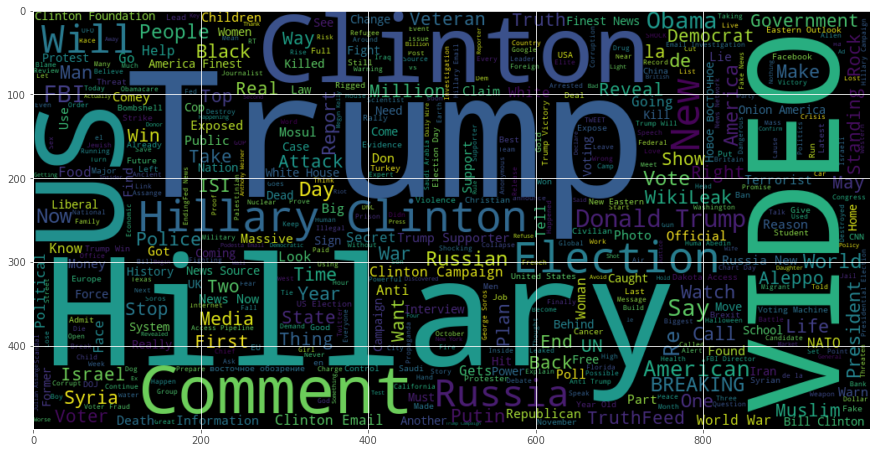

In [12]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(lemmatize_data[lemmatize_data.label == 0].title))
plt.imshow(wc , interpolation = 'bilinear')

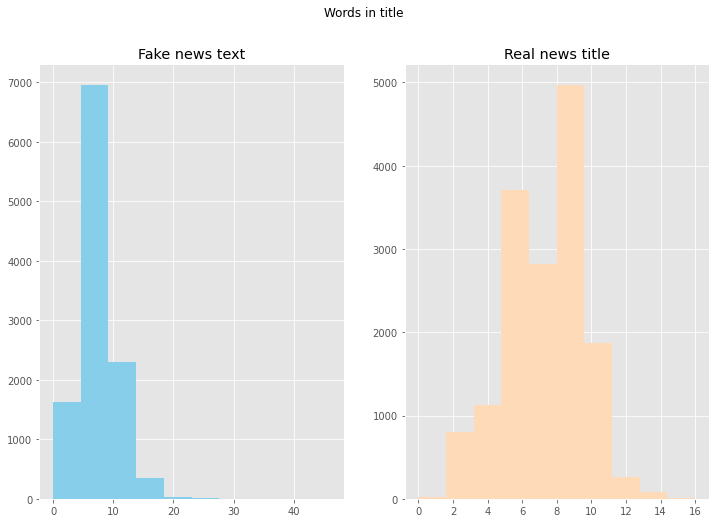

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=lemmatize_data[lemmatize_data['label']==0]['title_clean'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Fake news text')
text_len=lemmatize_data[lemmatize_data['label']==1]['title_clean'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='PeachPuff')
ax2.set_title('Real news title')
fig.suptitle('Words in title')
plt.show()

In [14]:
texts = ' '.join(lemmatize_data['title_clean'])

In [15]:
string = texts.split(" ")

In [16]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

         word  count
0    (trump,)   4938
1      (new,)   2535
2     (time,)   1842
3  (clinton,)   1830
4        (u,)   1620


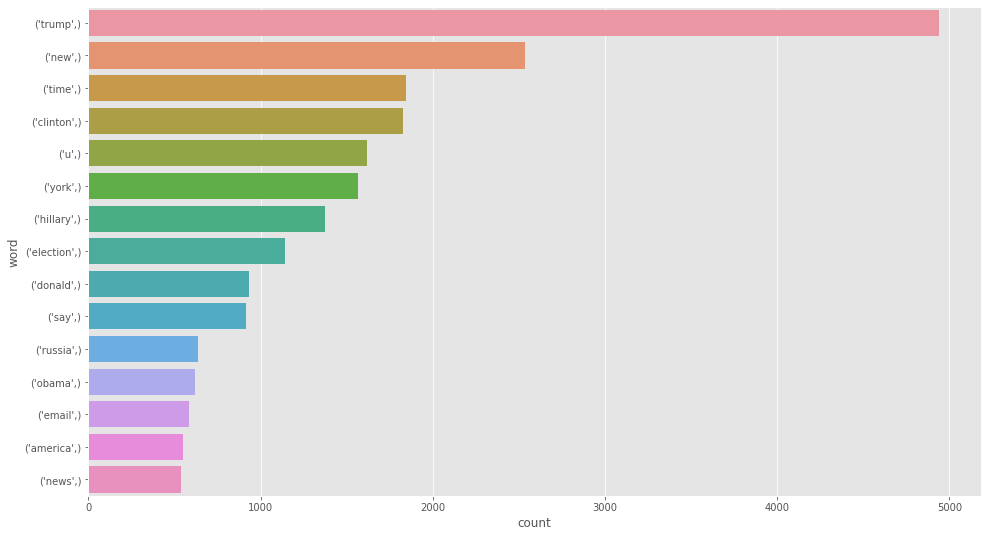

In [17]:
draw_n_gram(string,1)

                 word  count
0         (new, york)   1565
1        (york, time)   1458
2     (donald, trump)    898
3  (hillary, clinton)    547
4      (white, house)    160


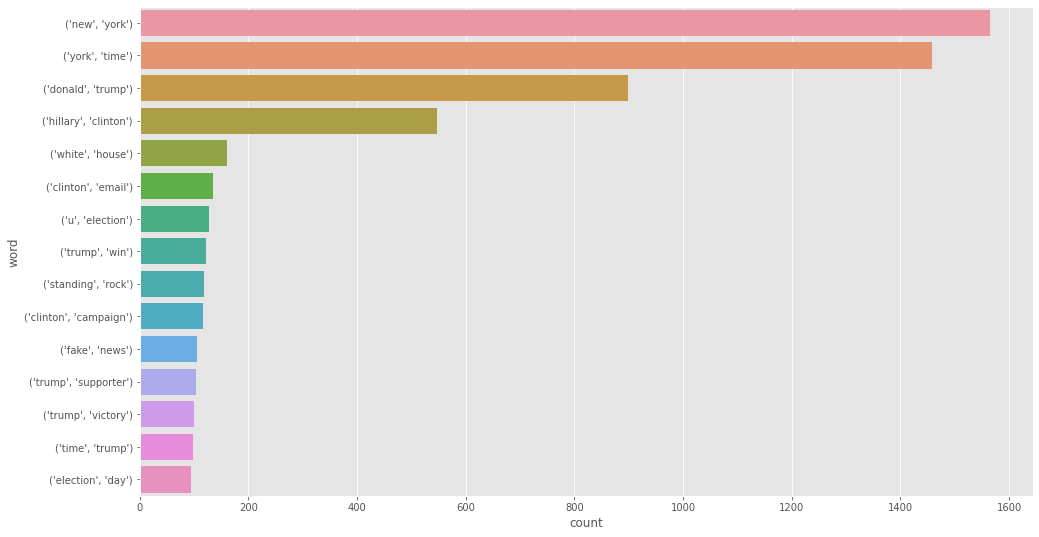

In [18]:
draw_n_gram(string,2)

                         word  count
0           (new, york, time)   1458
1       (briefing, new, york)     87
2         (york, time, trump)     87
3  (dakota, access, pipeline)     60
4    (onion, america, finest)     55


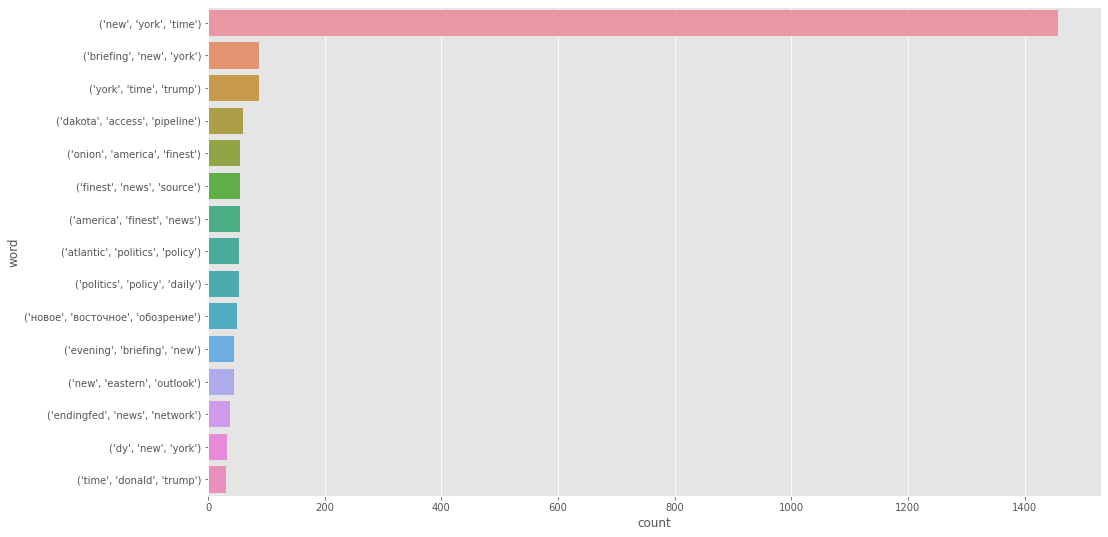

In [19]:
draw_n_gram(string,3)

In [20]:
features = lemmatize_data['title_clean']
targets = lemmatize_data['label']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)